In [4]:
from odlib import *

iterations=5 # Monte Carlo Iterations
inputFile="/home/soonali/Desktop/SoongSSP2022/input/SoongInput.txt" # Input File path
sunFile="/home/soonali/Desktop/SoongSSP2022/input/1999GJ2SunPos.txt" # Path for file containing times and sun positions for ephemeris generation
fitsFiles=["/home/soonali/Desktop/SoongSSP2022/fits/0628.fits", 
           "/home/soonali/Desktop/SoongSSP2022/fits/0712.fits", 
           "/home/soonali/Desktop/SoongSSP2022/fits/0714.fits"] # Fits Files path
dates=['2022-06-28 04:33:44.089','2022-07-12 04:16:40.826','2022-07-14 04:41:39.025'] # Dates selected
results=[1.535501123505049E+00, 1.980131722243141E-01, 1.127908127242095E+01, 
         1.961976310756240E+02, 1.425325538303718E+02, 3.163937598615976E+02, 
         2459856.859881772194] # [a,e,i,o,w,m,T], results from JPL horizons for 2022-07-12 04:16:40.826


sunFile = "/home/soonali/Desktop/SoongSSP2022/input/1999GJ2SunPos.txt"
ODdates = ['2022-06-28 04:33:44.089','2022-07-12 04:16:40.826','2022-07-14 04:41:39.025']
GenerateEphemeris(inputFile, dates, sunFile)

Finished generating ephemeris


--- Results from orbital elements determination ---
Semi-major axis: 
	actual: 1.535501123505049 
	calculated: 1.5347335844052366 
	error: 0.04998622847376947
Eccentricity: 
	actual: 0.1980131722243141 
	calculated: 0.19705335529721238 
	error: 0.48472377686794854
Inclination: 
	actual: 11.27908127242095 
	calculated: 11.297804647358708 
	error: 0.16600088682346967
Longitude of Ascending Node: 
	actual: 196.197631075624 
	calculated: 196.30886625285262 
	error: 0.05669547415980082
Argument of perihelion: 
	actual: 142.5325538303718 
	calculated: 142.49765048391222 
	error: 0.02448798223394676
Time of Perihelion Passage T: 
	actual: 2459161.8777567465 
	calculated: 2459162.648031663 
	error: 3.132266011566561e-05

--- Monte Carlo Simulation ---


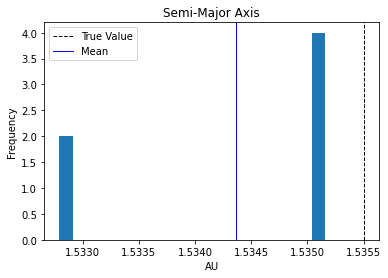

Semi-Major Axis: 
	mean: 1.534361921497114
	error: 0.07419089380635685
	standard deviation of mean: 0.0011083462800044904



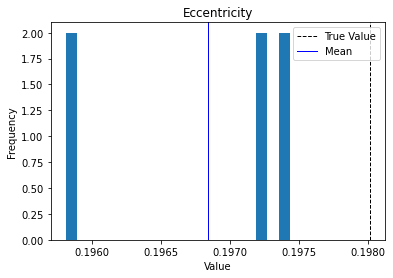

Eccentricity: 
	mean: 0.19683914811109846
	error: 0.5929020276922244
	standard deviation of mean: 0.0007280612736425883



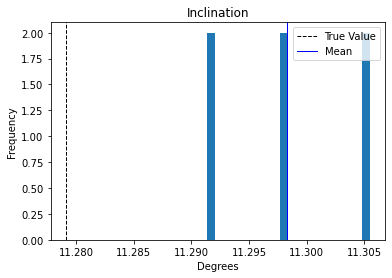

Inclination: 
	mean: 11.298275953621705
	error: 0.1701794741712603
	standard deviation of mean: 0.005806366138309006



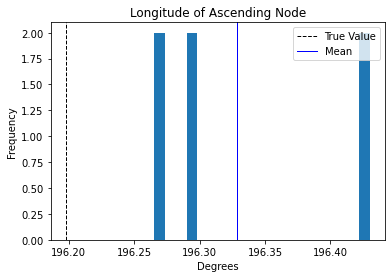

Longitude of Ascending Node: 
	mean: 196.32883288441326
	error: 0.06687226959365544
	standard deviation of mean: 0.07262945317919904



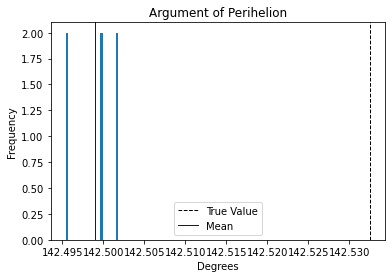

Argument of Perihelion: 
	mean: 142.49899303663184
	error: 0.023546055155857466
	standard deviation of mean: 0.002672514466871814



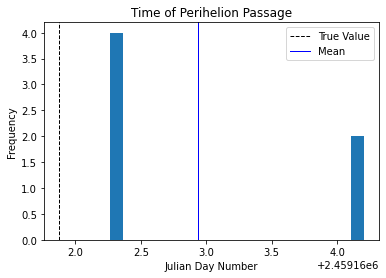

Time of Perihelion Passage: 
	mean: 2459162.937092912
	error: 4.307712212903268e-05
	standard deviation of mean: 0.8963400576179075

--- Ephemeris generation completed ---


In [5]:
RunCompleteOD(iterations, inputFile, fitsFiles, sunFile, dates, results)

Finished generating ephemeris
